# PEEKA SAIKUMAR
## 20KQ1A05H8

# Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import theano
import tensorflow
import keras
import sklearn
import seaborn

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Versions of Libraries

In [2]:
print("Numpy Version:", np.__version__)
print("Pandas Version:", pd.__version__)
print("Matplotlib Version:", matplotlib.__version__)
print("Theano Version:", theano.__version__)
print("Tensorflow Version:", tensorflow.__version__)
print("Keras Version:", keras.__version__)
print("Sklearn Version:", sklearn.__version__)
print("Seaborn Version:", seaborn.__version__)

Numpy Version: 1.22.3
Pandas Version: 2.0.3
Matplotlib Version: 3.7.2
Theano Version: 1.0.5
Tensorflow Version: 2.10.0
Keras Version: 2.10.0
Sklearn Version: 1.3.0
Seaborn Version: 0.13.2


### Read the dataset from the CSV file

In [3]:
dataset = pd.read_csv('C:/Users/Pavan Kalyan/OneDrive/Desktop/Diabetes Project/diabetes.csv')

### Get the total number of rows in the dataset

In [5]:
print(len(dataset))

768


### Get the total number of columns in the dataset

In [6]:
print(len(dataset.columns))

9


### Find the colum names of the dataset

In [7]:
print(dataset.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Extract features from the dataset

In [8]:
X = dataset.iloc[:, 0:8].values

### Extract the target variable from the dataset

In [9]:
y = dataset.iloc[:, 8].values

## Import LabelEncoder and OneHotEncoder for encoding

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Apply LabelEncoder to each column in the specified range

In [11]:
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [12]:
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [13]:
labelencoder_X_3 = LabelEncoder()
X[:, 3] = labelencoder_X_3.fit_transform(X[:, 3])

In [14]:
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])

In [15]:
labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_5.fit_transform(X[:, 5])

In [16]:
labelencoder_X_6 = LabelEncoder()
X[:, 6] = labelencoder_X_6.fit_transform(X[:, 6])

In [17]:
labelencoder_X_7 = LabelEncoder()
X[:, 7] = labelencoder_X_7.fit_transform(X[:, 7])

### Apply OneHotEncoding to the features to create dummy variables

In [18]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

### Split the Dataset into Training and Testing sets

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Initialize StandardScaler to scale features

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#### Standardize the training data and test data using the same scaler, fittng on the training data only

In [21]:
X_train = sc.fit_transform(X_train)
X = sc.fit_transform(X)
X_test = sc.transform(X_test)

# Initialize the neural network classifier as a sequential model

In [22]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()

# Add layers to the neural network

### First layer: Fully connected with 6 units, ReLU activation, and input dimension from X_train

In [23]:
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=X_train.shape[1]))

### Second layer: Fully connected with 6 units and ReLU activation

In [24]:
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

### Output layer: Fully connected with 1 unit and sigmoid activation for binary classification

In [25]:
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

### Compile the model using Adam optimizer, binary crossentropy loss, and accuracy as a metric

In [26]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Train the neural network model using the training data

In [27]:
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
62/62 [==============================] - 1s 3ms/step - loss: 0.6884 - accuracy: 0.6515
Epoch 2/100
62/62 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.6515
Epoch 3/100
62/62 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.6515
Epoch 4/100
62/62 [==============================] - 0s 3ms/step - loss: 0.4304 - accuracy: 0.6515
Epoch 5/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3410 - accuracy: 0.6612
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2899 - accuracy: 0.8893
Epoch 7/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2613 - accuracy: 0.9674
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2423 - accuracy: 0.9805
Epoch 9/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2288 - accuracy: 0.9870
Epoch 10/100
62/62 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9870
Epoch 11/

## Predict the labels for the test set

In [28]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

5/5 [==============================] - 0s 3ms/step


### Calculate the confusion matrix to assess the classification model's performance

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

## Get the confusion matrix to evaluate model performance

In [30]:
print(cm)

[[85 15]
 [36 18]]


## Get the accuracy of the model based on the test data and predicted values

In [31]:
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.6688311688311688


# Import necessary libraries for data visualization

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

### Set a color palette suitable for categorical data

In [33]:
sns.set_palette('husl')

### Drop the pregancies column

In [34]:
tmp = dataset.drop('Pregnancies', axis=1)

## Violin plot for Age vs Outcome

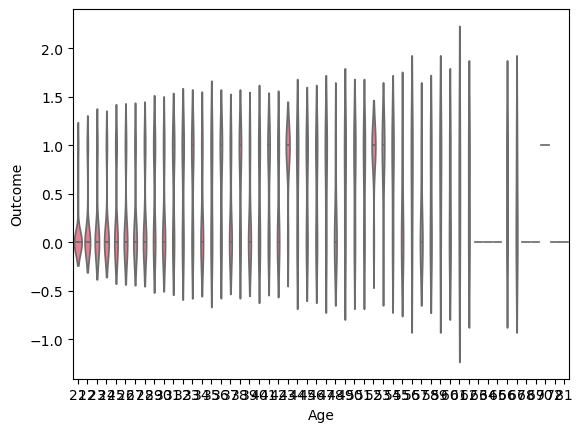

In [48]:
sns.violinplot(y='Outcome', x='Age', data=dataset, inner='quartile')
plt.show()

## Pie chart for the distribution of 'Outcome'

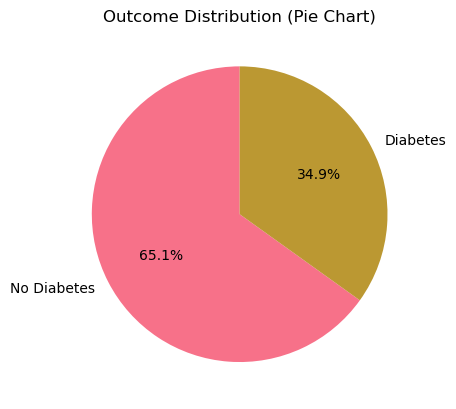

In [36]:
outcome_counts = dataset['Outcome'].value_counts()
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Outcome Distribution (Pie Chart)')
plt.show()

## Bar Plot for Glucose level by 'Outcome'


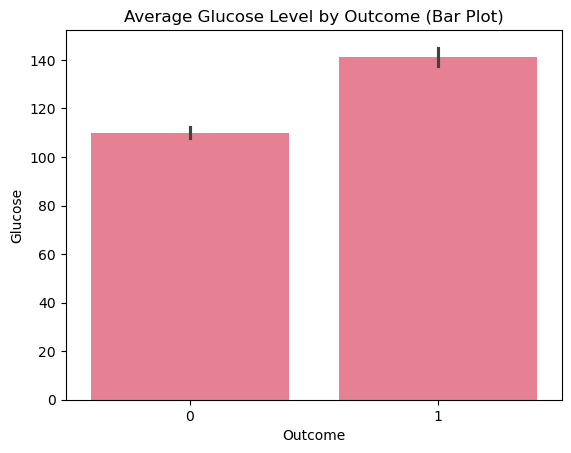

In [37]:
sns.barplot(x='Outcome', y='Glucose', data=dataset)
plt.title('Average Glucose Level by Outcome (Bar Plot)')
plt.show()

## Scatter Plot (BMI vs Age)

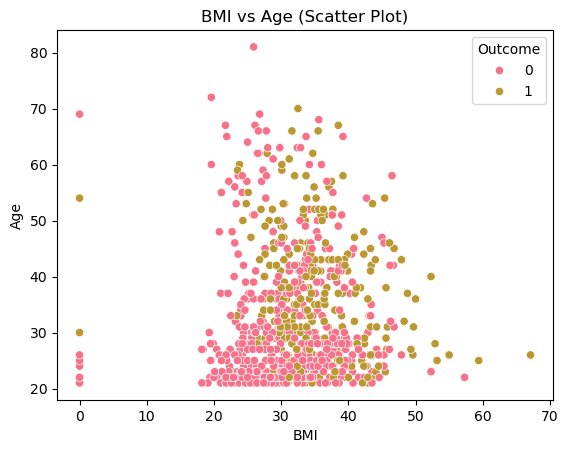

In [39]:
sns.scatterplot(x='BMI', y='Age', data=dataset, hue='Outcome')
plt.title('BMI vs Age (Scatter Plot)')
plt.show()

## Box Plot for Glucose distribution by Outcome

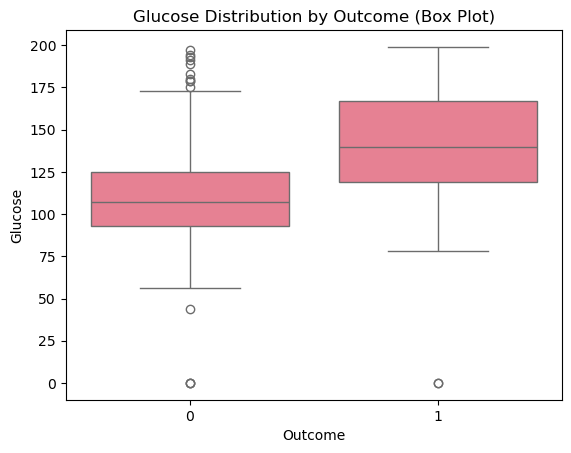

In [40]:
sns.boxplot(x='Outcome', y='Glucose', data=dataset)
plt.title('Glucose Distribution by Outcome (Box Plot)')
plt.show()

## Heatmap for correlation matrix

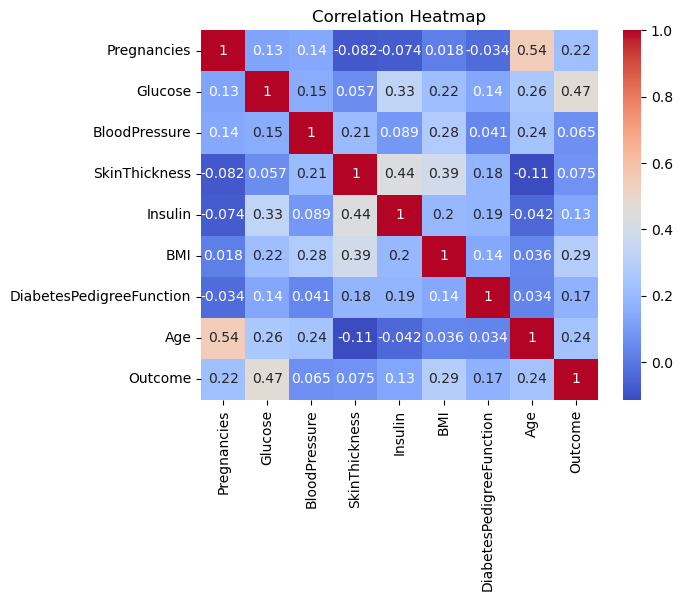

In [41]:
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Count Plot for Outcome distribution (count of 0s and 1s)

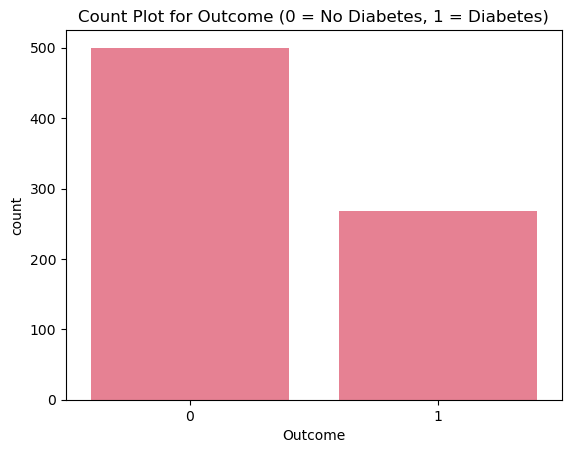

In [42]:
sns.countplot(x='Outcome', data=dataset)
plt.title('Count Plot for Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.show()

## Pair Plot for all numeric features to see relationships

C:\Users\Pavan Kalyan\anaconda3\envs\theano_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


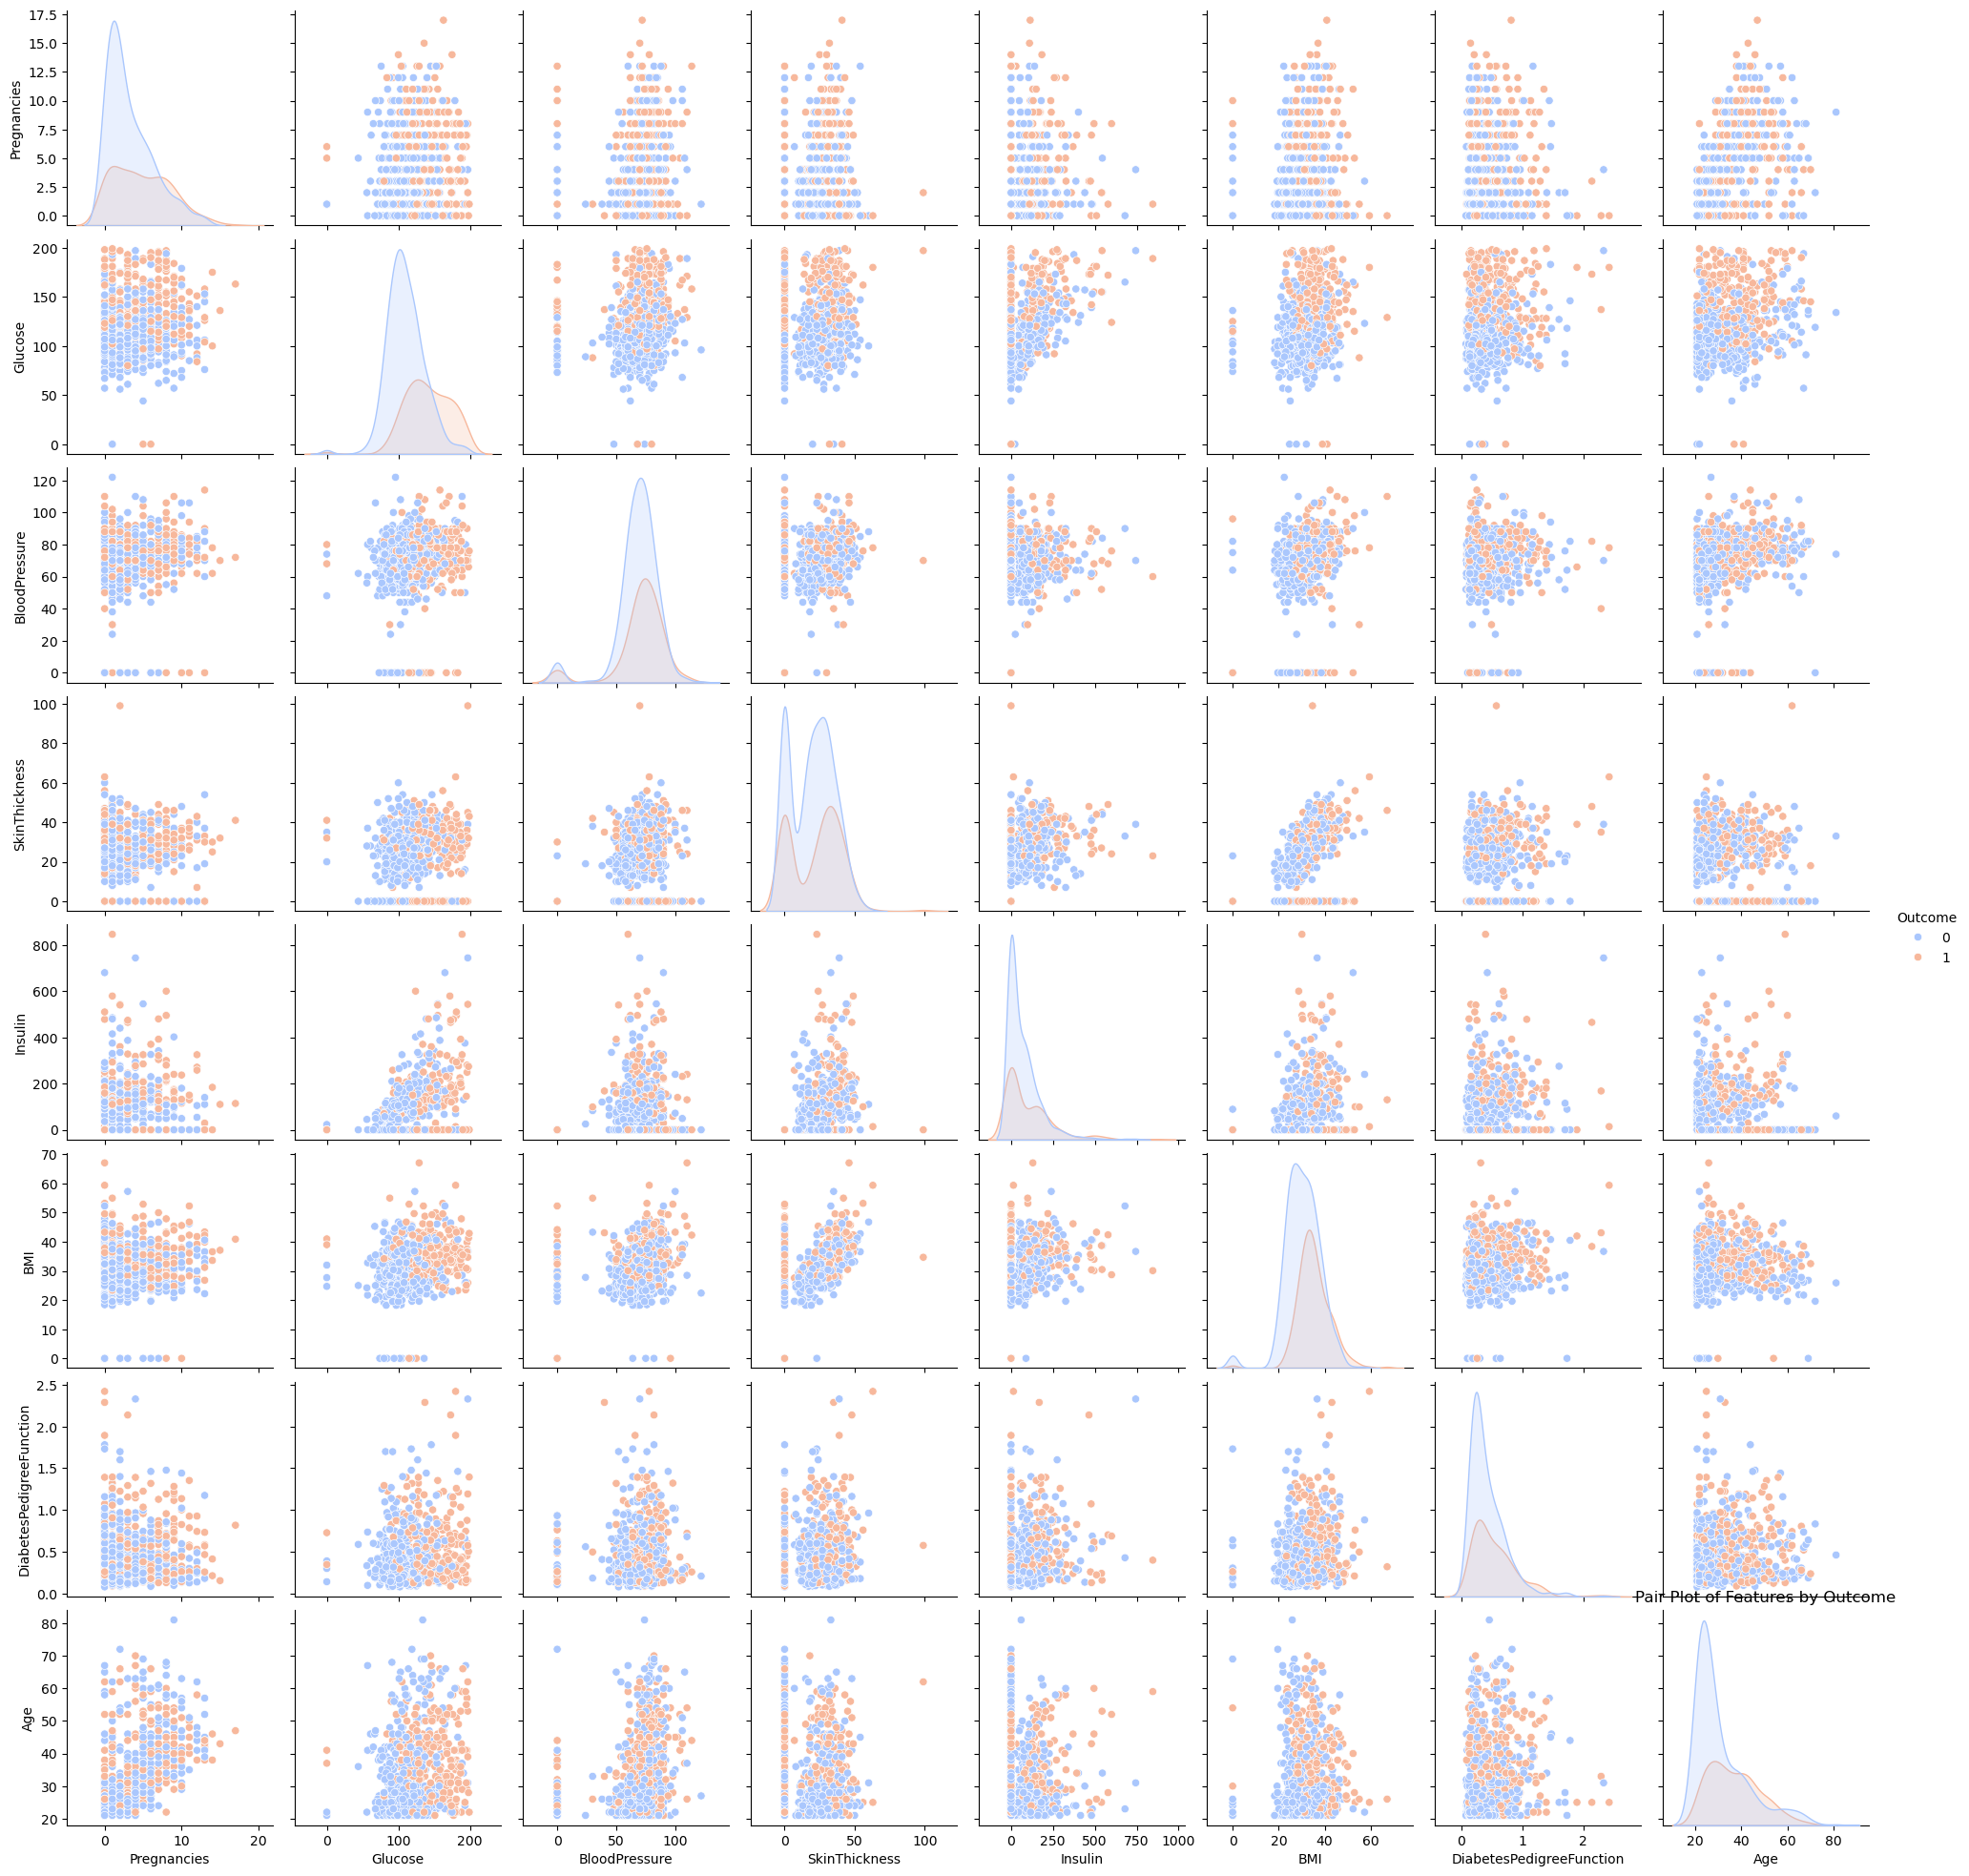

In [43]:
sns.pairplot(dataset, hue='Outcome', palette='coolwarm')
plt.title('Pair Plot of Features by Outcome')
plt.show()

## Histogram for Age distribution

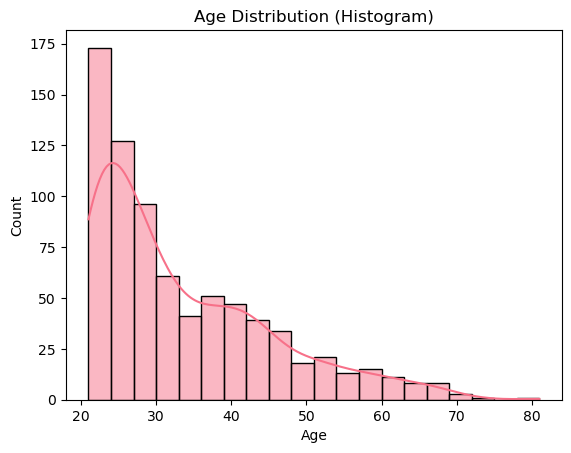

In [44]:
sns.histplot(dataset['Age'], kde=True, bins=20)
plt.title('Age Distribution (Histogram)')
plt.show()

## Line Plot tracking BMI across the dataset with Outcome hue

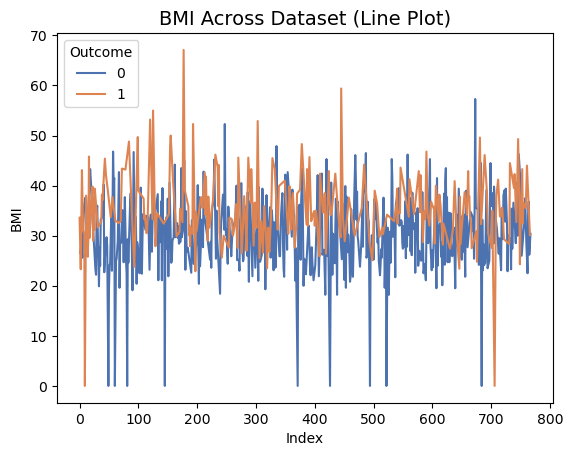

In [49]:
sns.lineplot(x=dataset.index, y=dataset['BMI'], hue=dataset['Outcome'], palette='deep')
plt.title('BMI Across Dataset (Line Plot)', fontsize=14)
plt.xlabel('Index')
plt.ylabel('BMI')
plt.show()

## FacetGrid showing Age vs BMI for different Outcomes

C:\Users\Pavan Kalyan\anaconda3\envs\theano_env\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


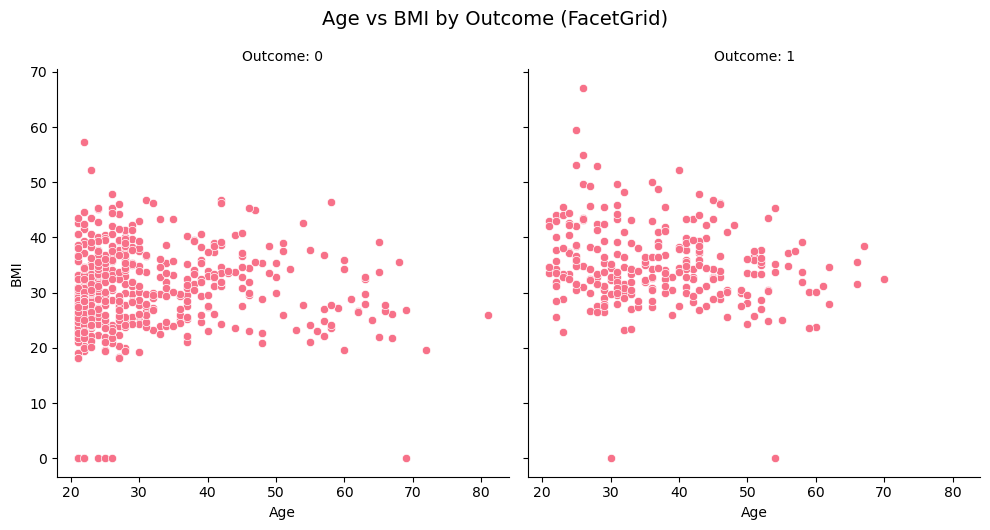

In [50]:
g = sns.FacetGrid(dataset, col='Outcome', height=5, palette='muted')
g.map(sns.scatterplot, 'Age', 'BMI')
g.set_axis_labels('Age', 'BMI')
g.set_titles('Outcome: {col_name}')
plt.suptitle('Age vs BMI by Outcome (FacetGrid)', fontsize=14, y=1.05)
plt.show()

## Regression Plot showing relationship between BMI and Age

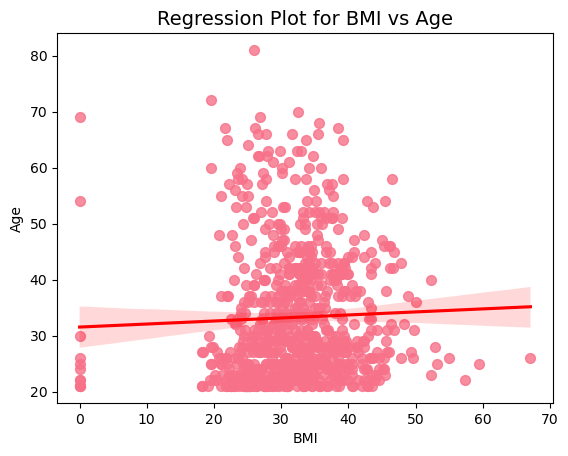

In [51]:
sns.regplot(x='BMI', y='Age', data=dataset, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Regression Plot for BMI vs Age', fontsize=14)
plt.xlabel('BMI')
plt.ylabel('Age')
plt.show()

## Bubble Plot showing Age vs Glucose with the size of points representing BMI

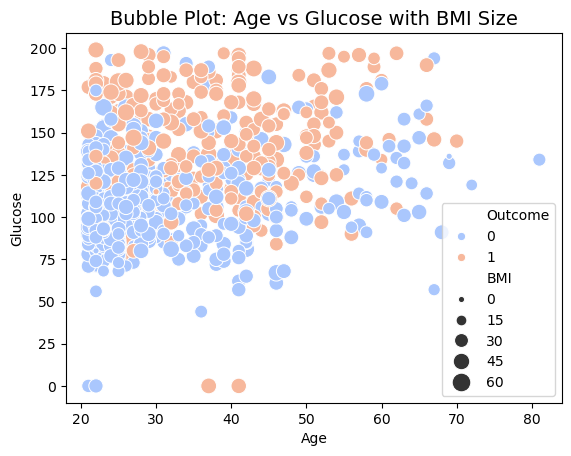

In [52]:
sns.scatterplot(x='Age', y='Glucose', size='BMI', data=dataset, sizes=(20, 200), hue='Outcome', palette='coolwarm')
plt.title('Bubble Plot: Age vs Glucose with BMI Size', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

## Stacked Bar Chart for Pregnancies vs Outcome by Age range

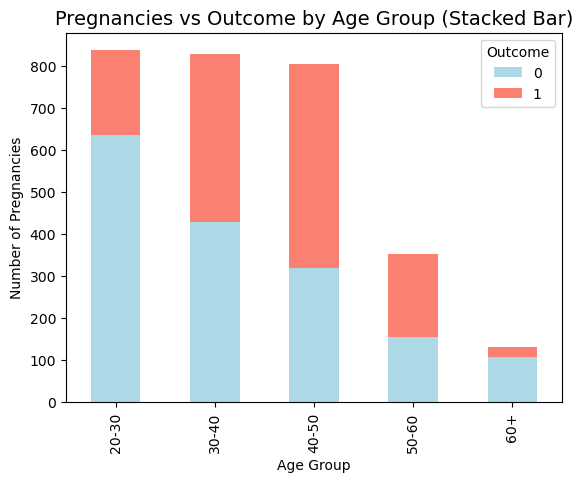

In [53]:
dataset['Age Group'] = pd.cut(dataset['Age'], bins=[20, 30, 40, 50, 60, 100], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
age_outcome_pivot = dataset.pivot_table(index='Age Group', columns='Outcome', values='Pregnancies', aggfunc='sum')
age_outcome_pivot.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Pregnancies vs Outcome by Age Group (Stacked Bar)', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Number of Pregnancies')
plt.show()

# Radar Chart

### Not Important

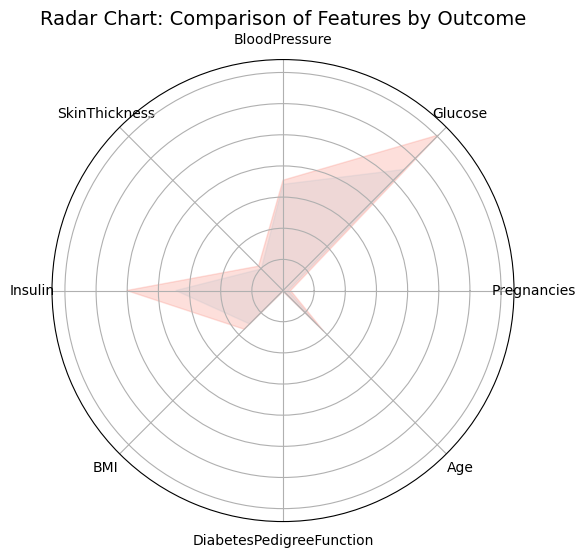

In [54]:
import numpy as np
from math import pi

# Categories to be plotted
categories = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Calculate mean values for each feature in the 'Outcome' categories
no_diabetes = dataset[dataset['Outcome'] == 0][categories].mean().values
diabetes = dataset[dataset['Outcome'] == 1][categories].mean().values

# Add the first value to the end to close the radar chart loop
values_no_diabetes = np.concatenate((no_diabetes, [no_diabetes[0]]))
values_diabetes = np.concatenate((diabetes, [diabetes[0]]))

# Compute the angles for the radar chart
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]  # Close the loop

# Create the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Plot the data
ax.fill(angles, values_no_diabetes, color='lightblue', alpha=0.25)
ax.fill(angles, values_diabetes, color='salmon', alpha=0.25)

# Add labels
ax.set_yticklabels([])  # Hide y-axis ticks
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=10)

# Set the title
plt.title('Radar Chart: Comparison of Features by Outcome', fontsize=14)

# Show the plot
plt.show()

## Strip plot to show individual data points of 'Age' by 'Outcome'


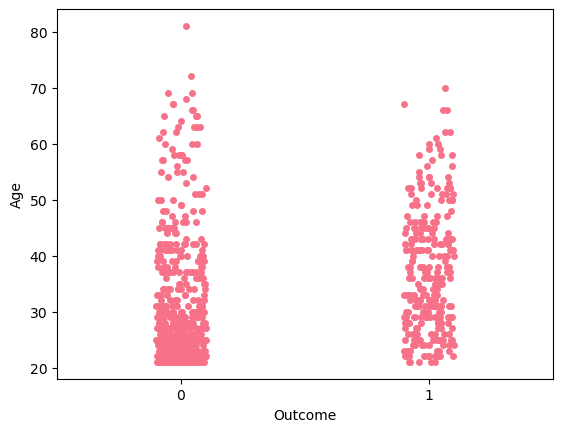

In [57]:
sns.stripplot(x='Outcome', y='Age', data=dataset, jitter=True)
plt.show()